In [24]:
# Load the dataset
import numpy as np
import matplotlib.pyplot as plt

X_train = np.loadtxt("datasets/mnist_small_train_in.txt", delimiter=',', usecols=range(784))
y_train = np.loadtxt("datasets/mnist_small_train_out.txt")
X_test = np.loadtxt("datasets/mnist_small_test_in.txt", delimiter=',', usecols=range(784))
y_test = np.loadtxt("datasets/mnist_small_test_out.txt")

0.0

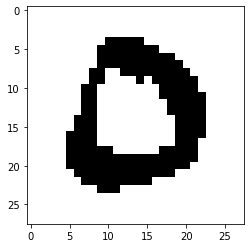

In [25]:
# Inspect a training example
plt.imshow(X_train[0].reshape(28,28), cmap=plt.cm.binary)
y_train[0]

In [26]:
# One hot encoding for labels
def one_hot_encoding(y_train):
    n = y_train.shape[0]
    y_onehot = np.zeros((n, 10))
    for i in range(n):
        number = int(y_train[i])
        y_onehot[i][number] = 1
    return y_onehot.T

# activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
# for classification at the output layer
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=0)
    

# categorical cross entropy loss function
def compute_loss(Y, pred):
    return -np.sum(Y * np.log(pred))
    

In [27]:
learning_rate = 1
h = 50 # number of neurons in the hidden layer
n = X_train.shape[1] # number of features, i.e. number of neurons in the input layer
d = 10 # number of digits, i.e. number of neurons in the output layer
m = X_train.shape[0] # number of training examples


# Initialize weight and bias parameters for first and second layer
w1 = np.random.randn(h, n) * np.sqrt(1. / n) # divide by the variance for better initialization
b1 = np.zeros((h, 1)) * np.sqrt(1. / n)
w2 = np.random.randn(d, h) * np.sqrt(1. / h)
b2 = np.zeros((d, 1)) * np.sqrt(1. / h)

X = X_train.T
Y = one_hot_encoding(y_train)
Y_test = one_hot_encoding(y_test)
X_test = X_test.T

# for gradient descent with momentum
b = .8
dw2_mom = np.zeros(w2.shape)
db2_mom = np.zeros(b2.shape)
dw1_mom = np.zeros(w1.shape)
db1_mom = np.zeros(b1.shape)

# for plotting the error rate on the test data
misclassifications = []

# training loop
for i in range(1000): # number of epochs
    # forward pass
    z1 = w1@X + b1
    a1 = sigmoid(z1)
    z2 = w2@a1 + b2
    a2 = softmax(z2)
    
    loss = compute_loss(Y, a2)
    
    # backward pass
    dz2 = a2 - Y
    dw2 = (dz2@a1.T) / m
    db2 = dz2@np.ones((m, 1)) / m 
    
    da1 = w2.T@dz2
    dz1 = da1 * sigmoid(z1) * (1 - sigmoid(z1)) 
    dw1 = dz1@X.T / m
    db1 = dz1@np.ones((m ,1)) / m  
    
    
    # optimization of parameters
    dw2_mom = (b * dw2_mom) + (1 - b) * dw2
    db2_mom = (b * db2_mom) + (1 - b) * db2
    dw1_mom = (b * dw1_mom) + (1 - b) * dw1
    db1_mom = (b * db1_mom) + (1 - b) * db1
    
    w2 = w2 - learning_rate * dw2_mom
    b2 = b2 - learning_rate * db2_mom
    w1 = w1 - learning_rate * dw1_mom
    b1 = b1 - learning_rate * db1_mom
    
    # forward pass with the test data
    predictions = np.argmax(softmax(w2@sigmoid(w1@X_test + b1) + b2), axis=0)
    labels = np.argmax(Y_test, axis=0)
    misclassifications.append(np.where(np.not_equal(predictions, labels))[0].shape[0] / len(predictions))

    if i % 100 == 0:
        print(i, loss)

0 14814.041168033766
100 2391.860908268138
200 1691.2973226248291
300 1356.7479712432084
400 1123.643738898555
500 943.7876377059765
600 799.2066742294205
700 680.4897326779728
800 582.0161148415593
900 500.0934197619272


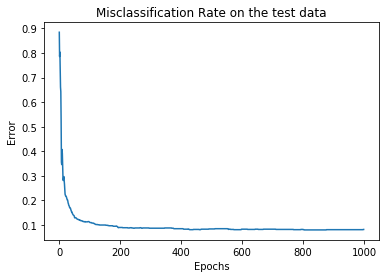

In [28]:
plt.plot(misclassifications)
plt.title("Misclassification Rate on the test data")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.savefig("misclassification_rate.png")